In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import csv
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 16
import numpy as np
import xarray as xr

import covid19

In [3]:
world = covid19.data.read_jhu_global('time_series_covid19_deaths_global.csv')
world

<xarray.Dataset>
Dimensions:       (location: 266, time: 131)
Coordinates:
    country       (location) <U32 'Afghanistan' 'Albania' ... 'Lesotho'
    lat           (location) float64 33.0 41.15 28.03 ... -11.65 38.86 -29.61
    lon           (location) float64 65.0 20.17 1.66 1.522 ... 43.33 71.28 28.23
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-05-31
  * location      (location) <U46 'Afghanistan' 'Albania' ... 'Lesotho'
    state_region  (location) <U46 'Afghanistan / ' 'Albania / ' ... 'Lesotho / '
Data variables:
    deaths        (time, location) int64 0 0 0 0 0 0 0 0 ... 0 10 1 12 80 2 47 0

In [4]:
world_latest = world.isel(time=-1)
world_latest = world_latest.sortby(-world_latest['deaths'])
world_latest.sel(location=world_latest['deaths'] > 300).to_dataframe()

,country,lat,lon,time,state_region,deaths
location,,,,,,
US,US,37.0902,-95.7129,2020-05-31,US /,104381
United Kingdom,United Kingdom,55.3781,-3.4360,2020-05-31,United Kingdom /,38489
Italy,Italy,43.0000,12.0000,2020-05-31,Italy /,33415
Brazil,Brazil,-14.2350,-51.9253,2020-05-31,Brazil /,29314
France,France,46.2276,2.2137,2020-05-31,France /,28751
Spain,Spain,40.0000,-4.0000,2020-05-31,Spain /,27127
Mexico,Mexico,23.6345,-102.5528,2020-05-31,Mexico /,9930
Belgium,Belgium,50.8333,4.0000,2020-05-31,Belgium /,9467
Germany,Germany,51.0000,9.0000,2020-05-31,Germany /,8540


In [5]:
usa = covid19.data.read_jhu_usa('time_series_covid19_deaths_us.csv')
usa

<xarray.Dataset>
Dimensions:       (location: 3261, time: 127)
Coordinates:
    state_region  (location) <U29 'US / American Samoa' ... 'US / Utah'
    country       (location) <U2 'US' 'US' 'US' 'US' ... 'US' 'US' 'US' 'US'
    lat           (location) float64 -14.27 13.44 15.1 ... 37.85 40.12 41.27
    lon           (location) float64 -170.1 144.8 145.7 ... -111.4 -109.5 -111.9
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-05-27
  * location      (location) <U57 'US / American Samoa / ' ... 'US / Utah / Weber-Morgan'
Data variables:
    population    (location) int64 55641 164229 55144 2933408 107268 ... 0 0 0 0
    deaths        (time, location) int64 0 0 0 0 0 0 0 0 0 ... 64 4 2 0 0 4 0 6

In [6]:
usa_latest = usa.isel(time=-1)
usa_latest = usa_latest.sortby(-usa_latest['deaths'])
usa_latest.sel(location=usa_latest['deaths'] > 300).to_dataframe()

,state_region,country,lat,lon,population,time,deaths
location,,,,,,,
US / New York / New York,US / New York,US,40.767273,-73.971526,8336817,2020-05-27,21362
US / Illinois / Cook,US / Illinois,US,41.841448,-87.816588,5150233,2020-05-27,3455
US / Michigan / Wayne,US / Michigan,US,42.280984,-83.281255,1749343,2020-05-27,2406
US / California / Los Angeles,US / California,US,34.308284,-118.228241,10039107,2020-05-27,2201
US / New York / Nassau,US / New York,US,40.740665,-73.589419,1356924,2020-05-27,2137
US / New York / Suffolk,US / New York,US,40.883201,-72.801217,1476601,2020-05-27,1861
US / New Jersey / Essex,US / New Jersey,US,40.786813,-74.246580,798975,2020-05-27,1624
US / Massachusetts / Middlesex,US / Massachusetts,US,42.486077,-71.390492,1611699,2020-05-27,1549
US / New Jersey / Bergen,US / New Jersey,US,40.960109,-74.071643,932202,2020-05-27,1547


In [7]:
usa_states = usa.groupby('state_region').sum()
usa_states = usa_states.assign_coords({
    'location': ('state_region', usa_states.state_region),
    'lat': ('state_region', usa['lat'].groupby('state_region').mean()),
    'lon': ('state_region', usa['lon'].groupby('state_region').mean()),
    'country': ('state_region', ['US'] * usa_states.state_region.size),
})
usa_states = usa_states.swap_dims({'state_region': 'location'})
usa_states

<xarray.Dataset>
Dimensions:       (location: 58, time: 127)
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-05-27
    state_region  (location) object 'US / Alabama' ... 'US / Wyoming'
  * location      (location) object 'US / Alabama' ... 'US / Wyoming'
    lat           (location) float64 31.93 56.37 -14.27 ... 37.45 43.2 39.64
    lon           (location) float64 -84.2 -136.4 -170.1 ... -87.37 -98.58
    country       (location) <U2 'US' 'US' 'US' 'US' ... 'US' 'US' 'US' 'US'
Data variables:
    population    (location) int64 4903185 731545 55641 ... 5822434 578759
    deaths        (location, time) int64 0 0 0 0 0 0 0 ... 12 12 12 12 12 13 14

In [8]:
usa_states_latest = usa_states.isel(time=-1)
usa_states_latest = usa_states_latest.sortby(-usa_states_latest['deaths'])
usa_states_latest.sel(location=usa_states_latest['deaths'] > 300).to_dataframe()

,time,population,deaths,state_region,lat,lon,country
location,,,,,,,
US / New York,2020-05-27,26161672,29484,US / New York,41.214647,-73.115615,US
US / New Jersey,2020-05-27,8882190,11339,US / New Jersey,36.783272,-68.133541,US
US / Massachusetts,2020-05-27,6892503,6547,US / Massachusetts,37.117303,-63.016296,US
US / Michigan,2020-05-27,9986857,5334,US / Michigan,42.018626,-81.265296,US
US / Pennsylvania,2020-05-27,12801989,5265,US / Pennsylvania,39.634946,-75.365598,US
US / Illinois,2020-05-27,12671821,5083,US / Illinois,39.077394,-87.463362,US
US / California,2020-05-27,39512223,3894,US / California,36.582496,-116.704308,US
US / Connecticut,2020-05-27,3565287,3803,US / Connecticut,33.290944,-58.125464,US
US / Louisiana,2020-05-27,4648794,2723,US / Louisiana,30.150233,-89.041636,US


In [22]:
italy = covid19.data.read_dpc('dpc-covid19-ita-regioni.csv')
italy

<xarray.Dataset>
Dimensions:            (location: 21, time: 98)
Coordinates:
  * time               (time) datetime64[ns] 2020-02-24 ... 2020-05-31
  * location           (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
    lat                (location) float64 42.35 40.64 38.91 ... 45.74 45.43
    lon                (location) float64 13.4 15.81 16.59 ... 12.39 7.32 12.34
    country            (location) <U5 'Italy' 'Italy' ... 'Italy' 'Italy'
    state_region       (location) <U29 'Italy / Abruzzo' ... 'Italy / Veneto'
Data variables:
    current_severe     (time, location) int64 0 0 0 0 10 0 ... 65 97 15 12 112
    current_critical   (time, location) int64 0 0 0 0 2 0 1 ... 11 2 7 28 2 0 6
    deaths             (time, location) int64 0 0 0 0 0 ... 274 1041 76 143 1918
    current_confirmed  (time, location) int64 0 0 0 0 18 ... 986 1111 31 15 1500
    confirmed          (time, location) int64 0 0 0 0 ... 10104 1431 1184 19152
    tests              (time, location) int64 5 0 1 10 ... 70553 15203 669768
    tested             (time, location) float64 0.0 0.0 ... 1.193e+04 3.338e+05
    dimessi_guariti    (time, location) int64 0 0 0 0 0 ... 7952 1324 1026 15734
    population         (location) int64 1322247 570365 ... 126883 4907529

In [23]:
italy_latest = italy.isel(time=-1)
italy_latest = italy_latest.sortby(-italy_latest['deaths'])
italy_latest.sel(location=italy_latest['deaths'] > 300).to_dataframe()

,current_severe,current_critical,deaths,current_confirmed,confirmed,tests,tested,dimessi_guariti,population,time,lat,lon,country,state_region
location,,,,,,,,,,,,,,
Italy / Lombardia,3131,170,16112,20996,88968,753874,445930.0,51860,10018806,2020-05-31,45.466794,9.190347,Italy,Italy / Lombardia
Italy / Emilia-Romagna,393,57,4114,3163,27790,325482,197423.0,20513,4448841,2020-05-31,44.494367,11.341721,Italy,Italy / Emilia-Romagna
Italy / Piemonte,973,58,3867,5161,30637,319133,207714.0,21609,4392526,2020-05-31,45.073274,7.680687,Italy,Italy / Piemonte
Italy / Veneto,112,6,1918,1500,19152,669768,333834.0,15734,4907529,2020-05-31,45.434905,12.338452,Italy,Italy / Veneto
Italy / Liguria,195,8,1465,669,9663,106363,59374.0,7529,1565307,2020-05-31,44.411493,8.932699,Italy,Italy / Liguria
Italy / Toscana,97,28,1041,1111,10104,252090,179296.0,7952,3742437,2020-05-31,43.769231,11.255889,Italy,Italy / Toscana
Italy / Marche,62,9,987,1338,6730,103634,65617.0,4405,1538055,2020-05-31,43.616760,13.518875,Italy,Italy / Marche
Italy / Lazio,730,57,735,2983,7728,255474,206235.0,4010,5898124,2020-05-31,41.892770,12.483667,Italy,Italy / Lazio
Italy / Puglia,143,11,504,1177,4494,118652,79314.0,2813,4063888,2020-05-31,41.125596,16.867367,Italy,Italy / Puglia


In [24]:
deaths_outbreaks = xr.concat([world['deaths'], usa['deaths'], usa_states['deaths'], italy['deaths']], dim='location')
deaths_outbreaks

<xarray.DataArray 'deaths' (time: 131, location: 3606)>
array([[   0.,    0.,    0., ...,   nan,   nan,   nan],
       [   0.,    0.,    0., ...,   nan,   nan,   nan],
       [   0.,    0.,    0., ...,   nan,   nan,   nan],
       ...,
       [ 246.,   33.,  638., ...,   76.,  143., 1906.],
       [ 249.,   33.,  646., ...,   76.,  143., 1916.],
       [ 257.,   33.,  653., ...,   76.,  143., 1918.]])
Coordinates:
  * time          (time) datetime64[ns] 2020-01-22 2020-01-23 ... 2020-05-31
    country       (location) <U32 'Afghanistan' 'Albania' ... 'Italy' 'Italy'
    lat           (location) float64 33.0 41.15 28.03 ... 43.11 45.74 45.43
    lon           (location) float64 65.0 20.17 1.66 1.522 ... 12.39 7.32 12.34
  * location      (location) object 'Afghanistan' 'Albania' ... 'Italy / Veneto'
    state_region  (location) object 'Afghanistan / ' ... 'Italy / Veneto'

In [25]:
tas = xr.open_dataarray('ERA5_2m_temperature-day30.nc')
tas

<xarray.DataArray 'tas' (time: 114, lat: 721, lon: 1440)>
[118359360 values with dtype=float32]
Coordinates:
    realization  int64 ...
  * lon          (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat          (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time         (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-04-23

In [26]:
# tas = xr.open_dataarray('ERA5_2m_temperature-day.nc').rolling({'time': 30}).mean().rename('tas')
# tas.to_netcdf('ERA5_2m_temperature-day30.nc', encoding={'tas': {'zlib': True, 'complevel': 9}})
# tas

In [32]:
deaths_exponential_outbreaks = covid19.data.read_outbreaks_metadata('c3s-covid-19-data - deaths-exponential-outbreaks.csv')
len(deaths_exponential_outbreaks)

53

In [33]:
outbreaks_fits = covid19.fit.fit_exponential_outbreaks([deaths_outbreaks], deaths_exponential_outbreaks)
len(outbreaks_fits)

29

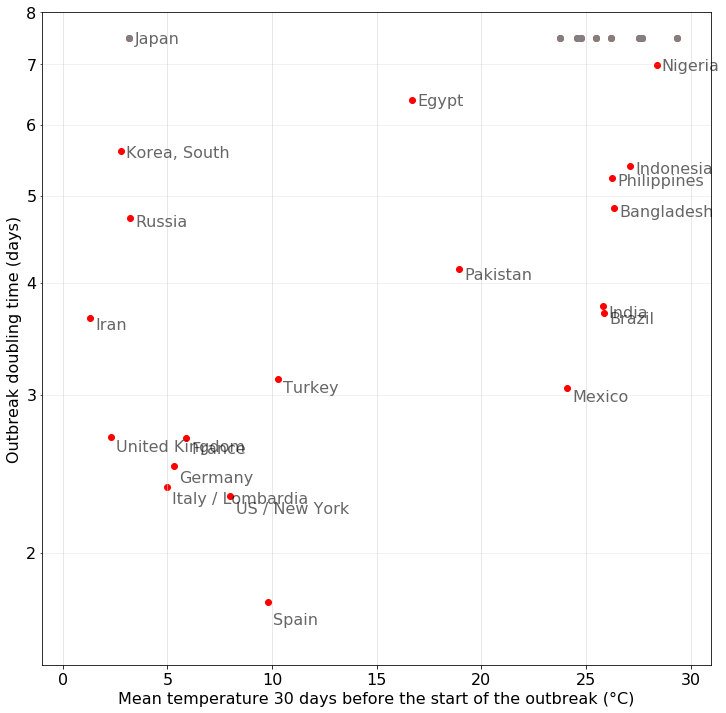

In [41]:
xx = [tas.sel(time=o['start'], lat=o['lat'], lon=o['lon'] % 360., method='nearest') for o in outbreaks_fits]
locations, yy = zip(*[(o['location'], o['fit'].T_d_days) for o in outbreaks_fits])
yy = np.minimum(7.5, yy)
yy[np.isnan(yy)] = 7.5
_, ax = covid19.plot.subplots(tick_right=False, figsize=(12,12))
_ = ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.yaxis.grid(which="both", alpha=0.2)
ax.set(yscale='log', ylim=(1.5, 8), xlim=(-1, 31))
ax.scatter(xx, yy, color='red')
for l, x, y in zip(locations, xx, yy):
    if y != 7.5 or x < 20:
        ax.annotate(l, (x + 0.25, y - 0.1), alpha=0.6)
    if y == 7.5:
        ax.scatter(x, y, color='gray')

_ = ax.set(xlabel='Mean temperature 30 days before the start of the outbreak (°C)', ylabel='Outbreak doubling time (days)')
_ = ax.yaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter('%d'))


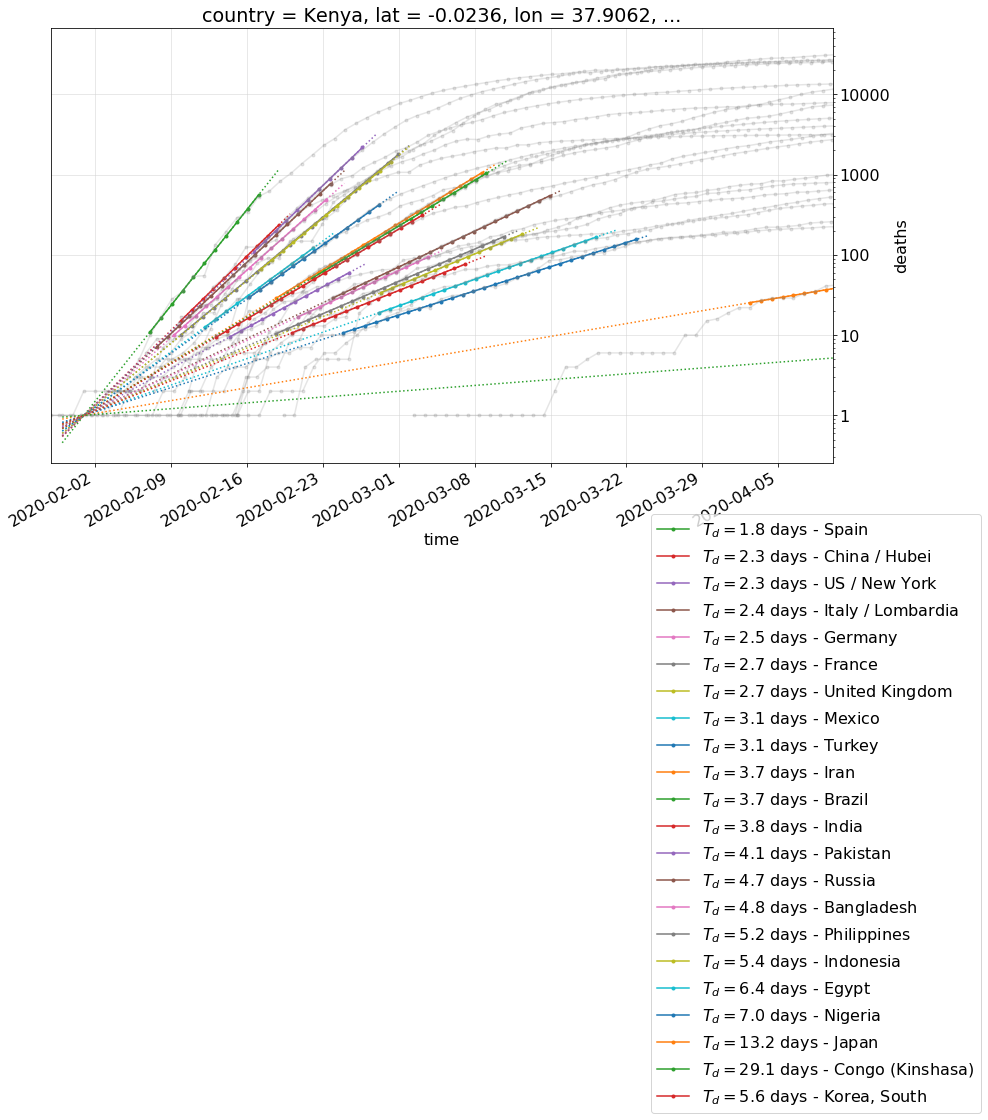

In [30]:
f, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log'})
for o in sorted(outbreaks_fits, key=lambda x: x['fit'].T_d_days):
    try:
        covid19.plot.plot_fit(ax, o['fit'].shift(np.datetime64('2020-02-01') - o['fit'].t_0), label=o['location'], extrapolate=(np.datetime64('2020-01-30'), +2))
    except ValueError:
        pass
    try:
        covid19.plot.plot_data(ax, deaths_outbreaks.sel(location=o['location']), delay=np.datetime64('2020-02-01') - o['fit'].t_0, alpha=0.2, color='gray')
    except:
        pass

_ = ax.legend(bbox_to_anchor=(1.2, -.1))
_ = ax.set(xlim=(np.datetime64('2020-01-29'), np.datetime64('2020-04-10')))

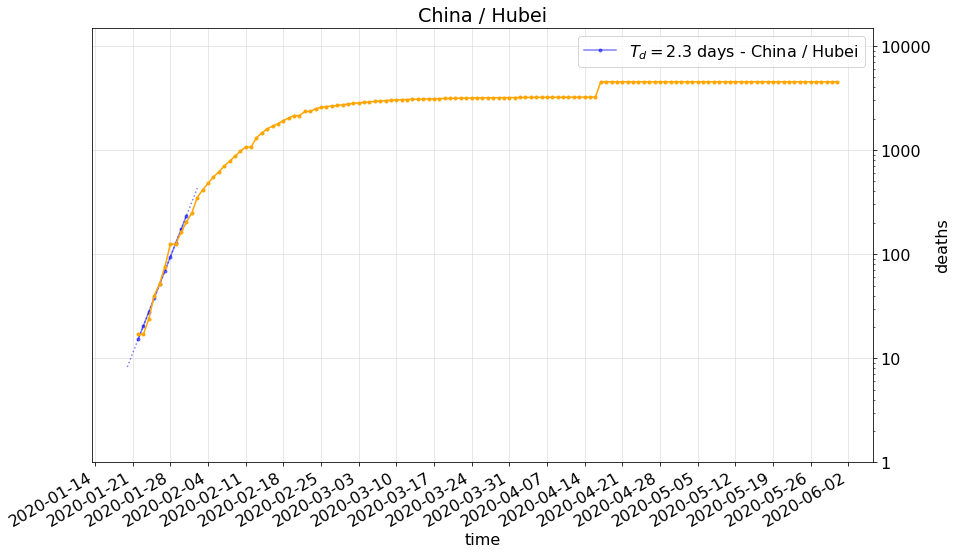

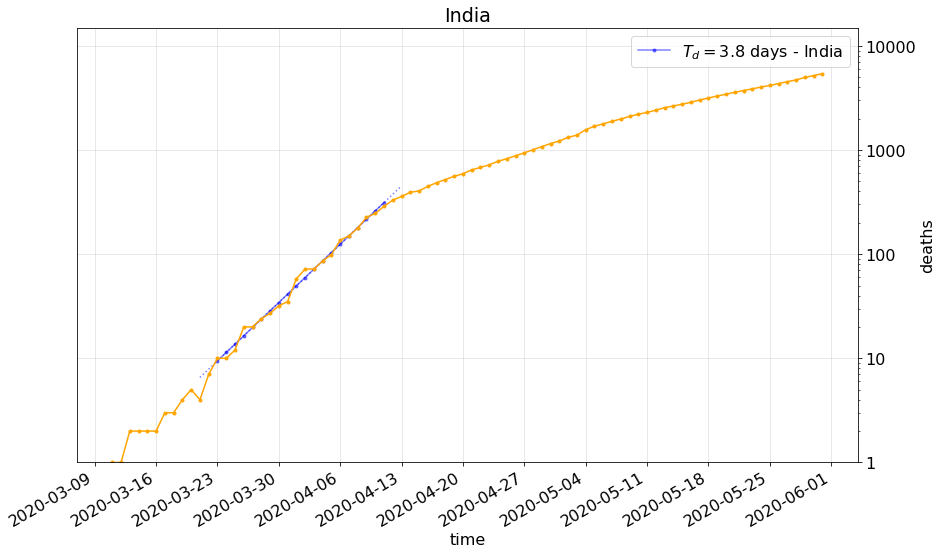

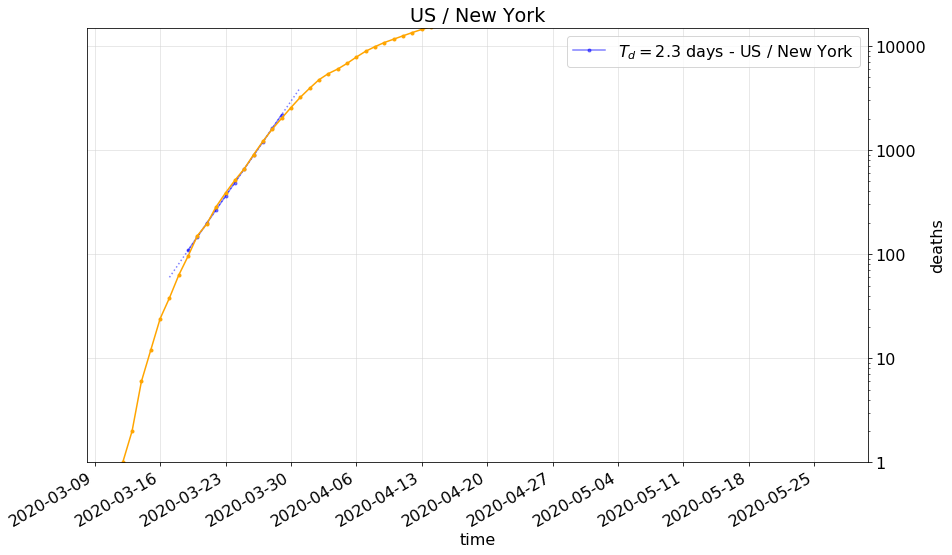

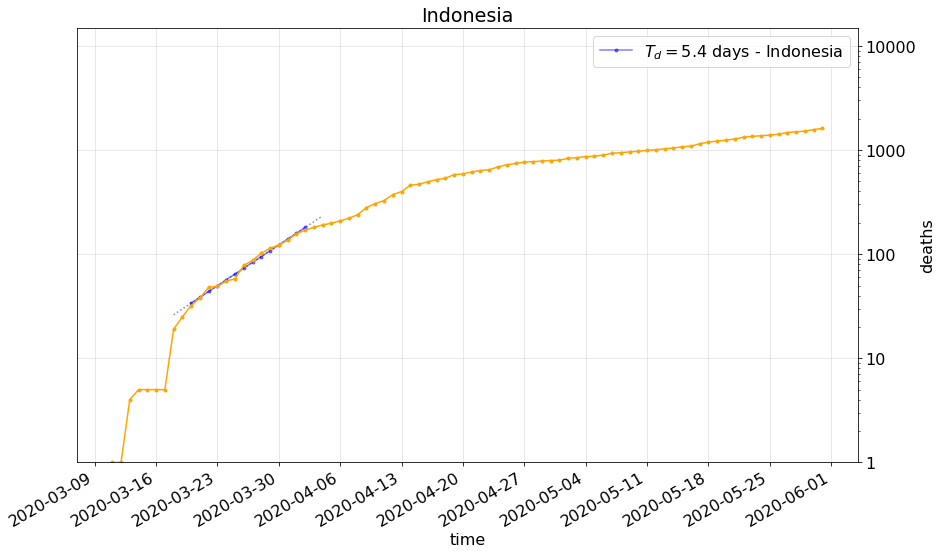

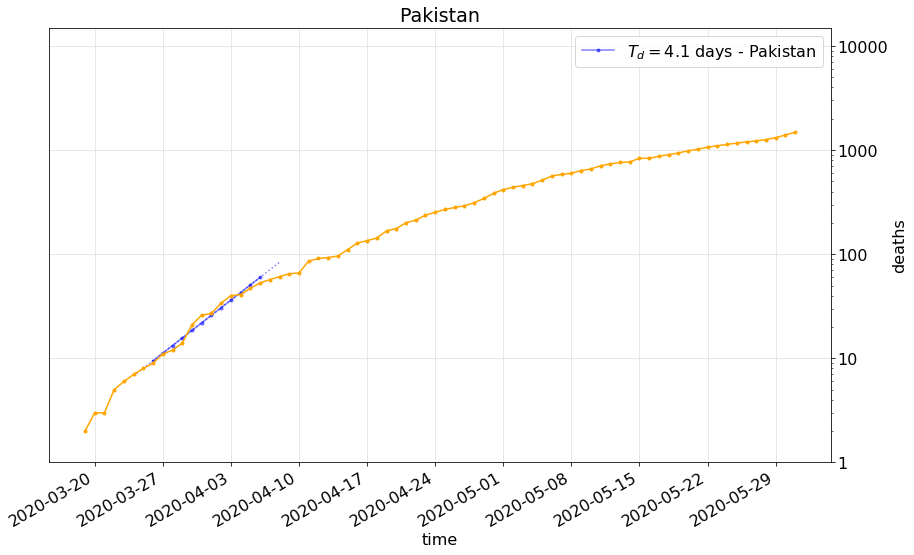

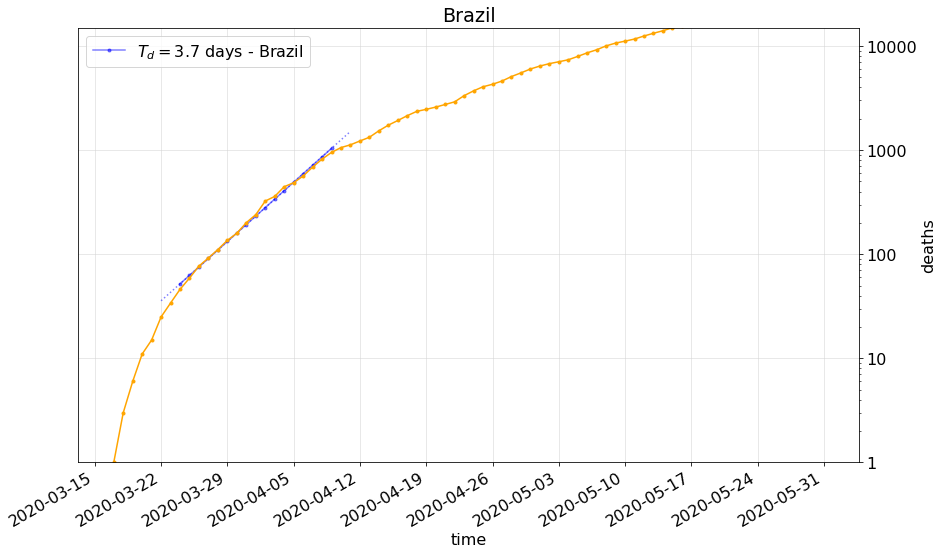

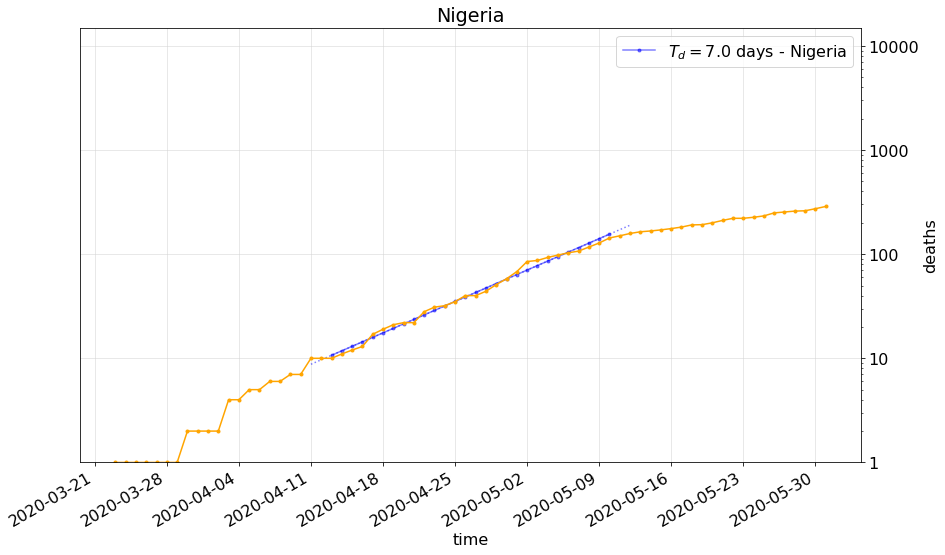

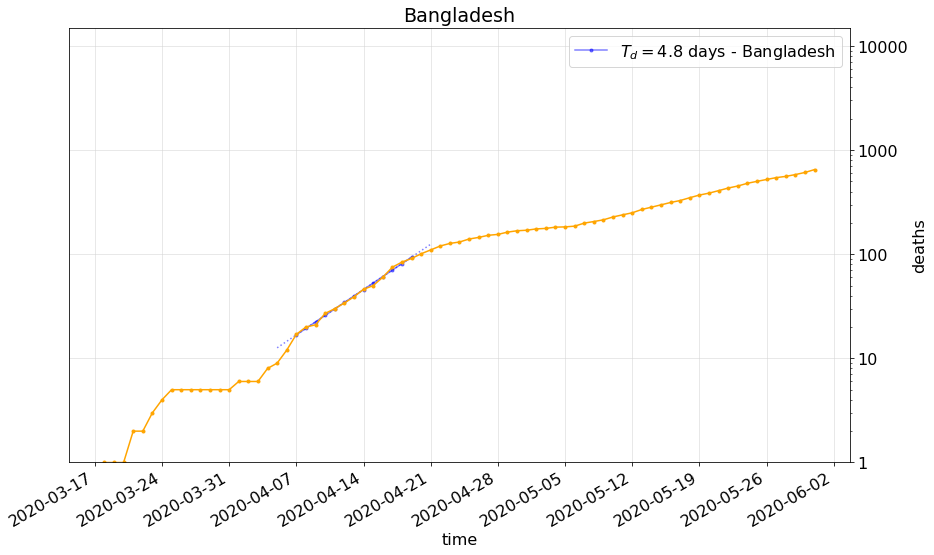

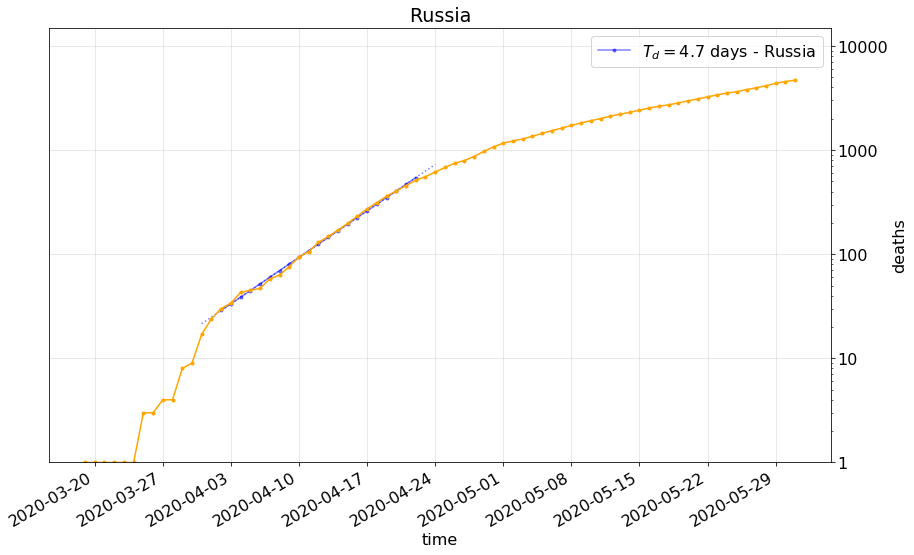

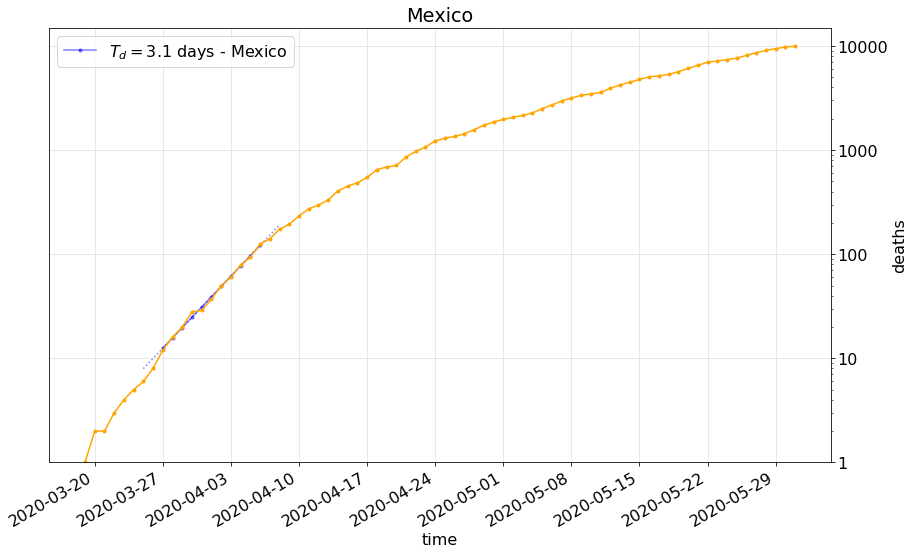

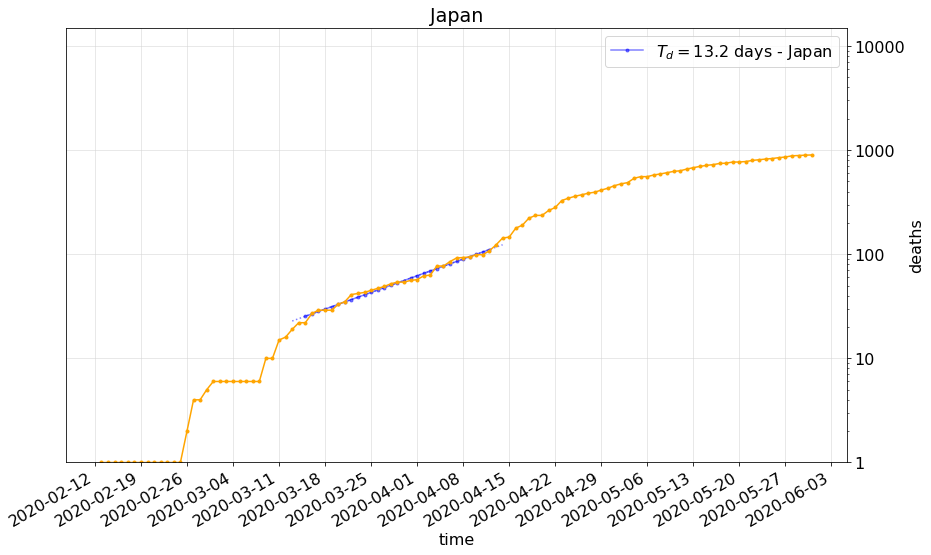

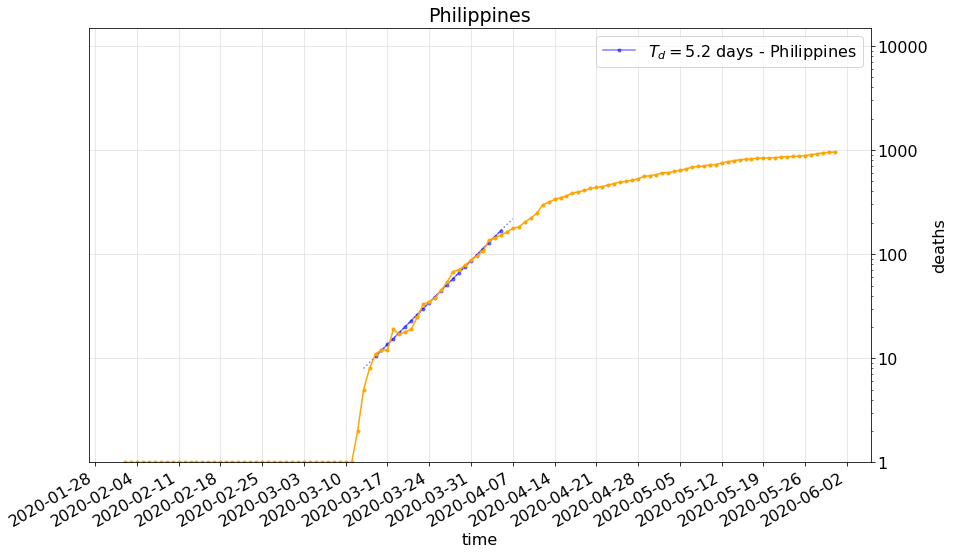

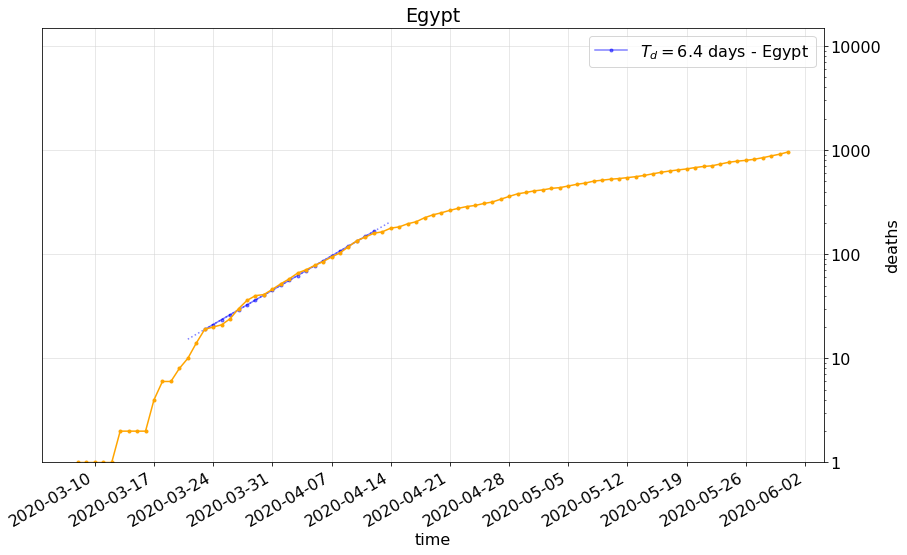

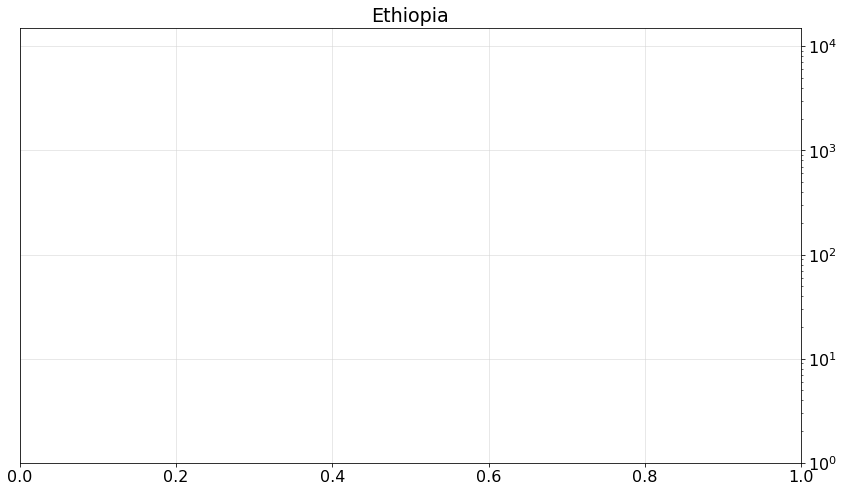

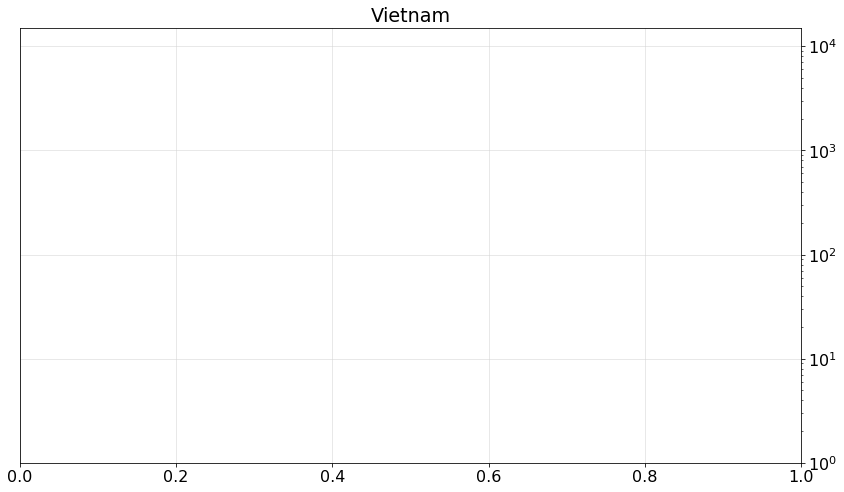

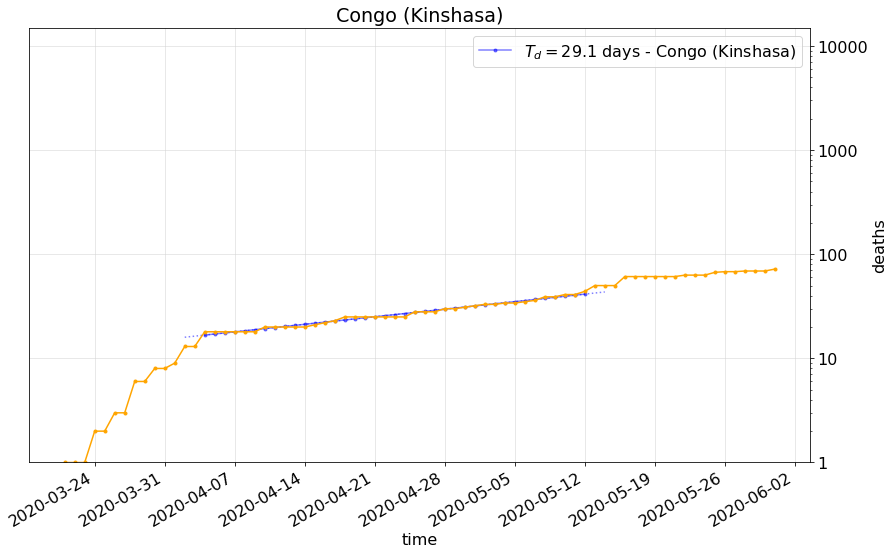

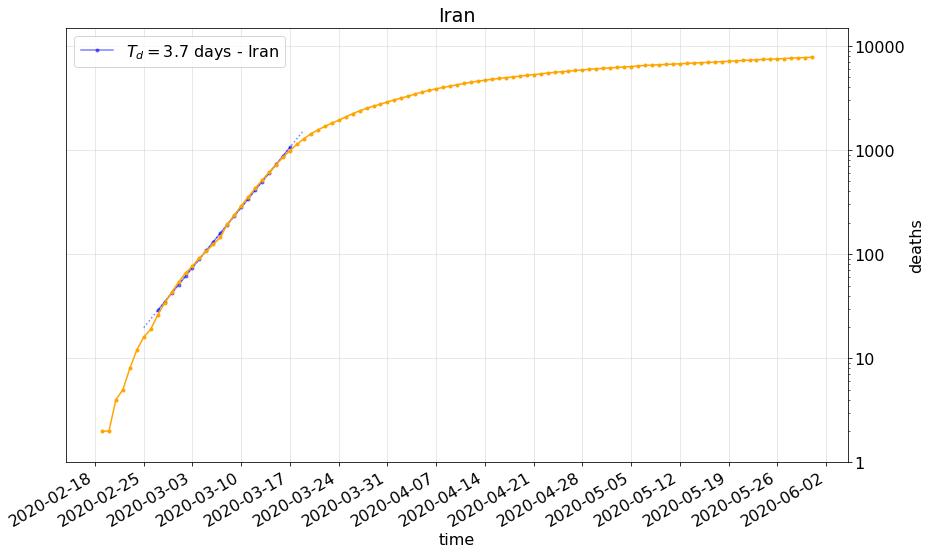

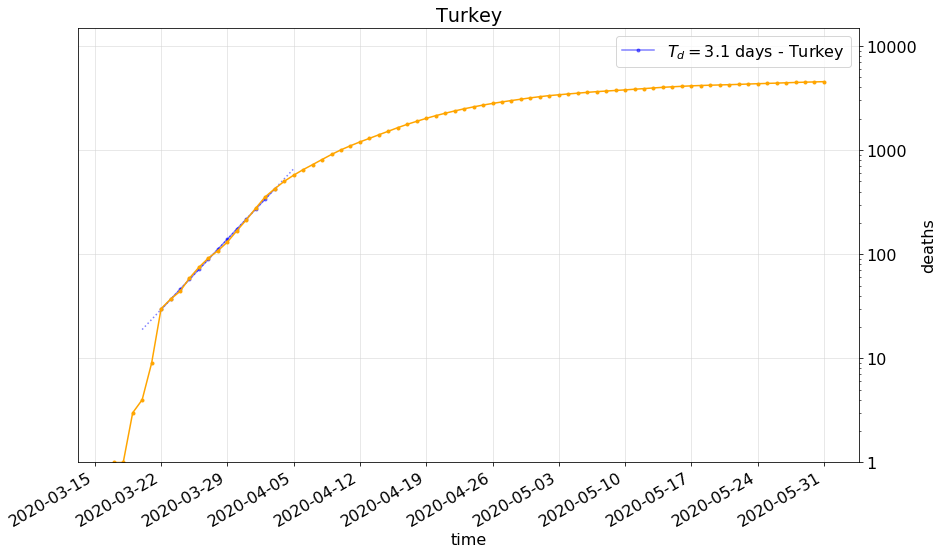

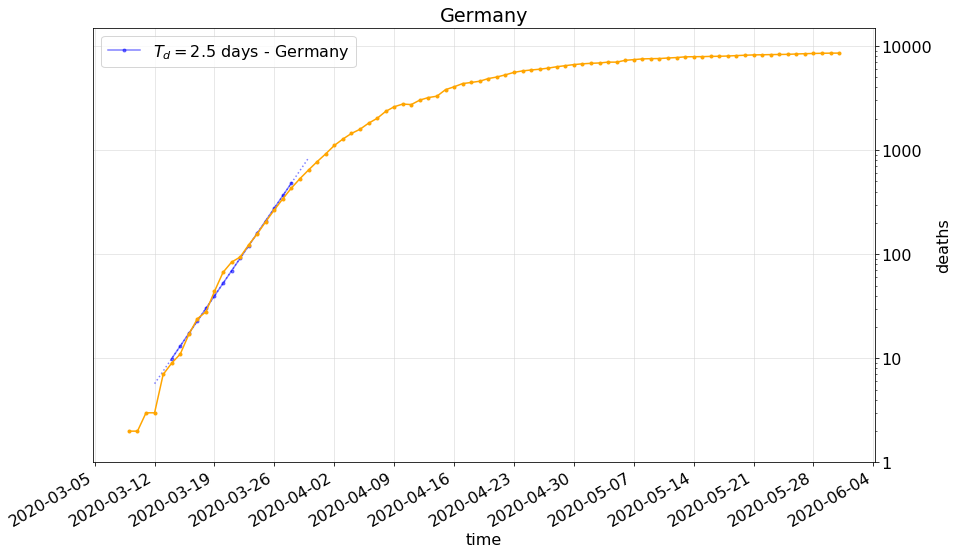

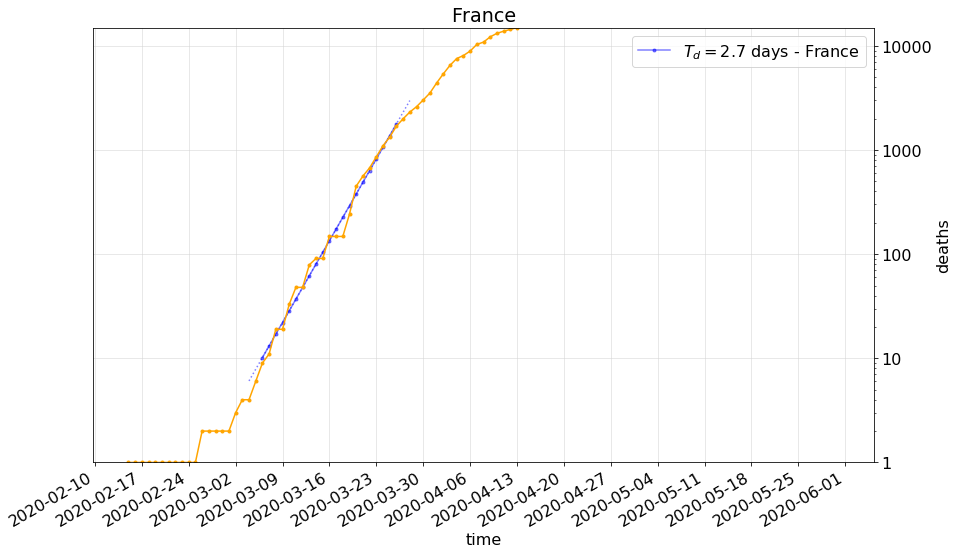

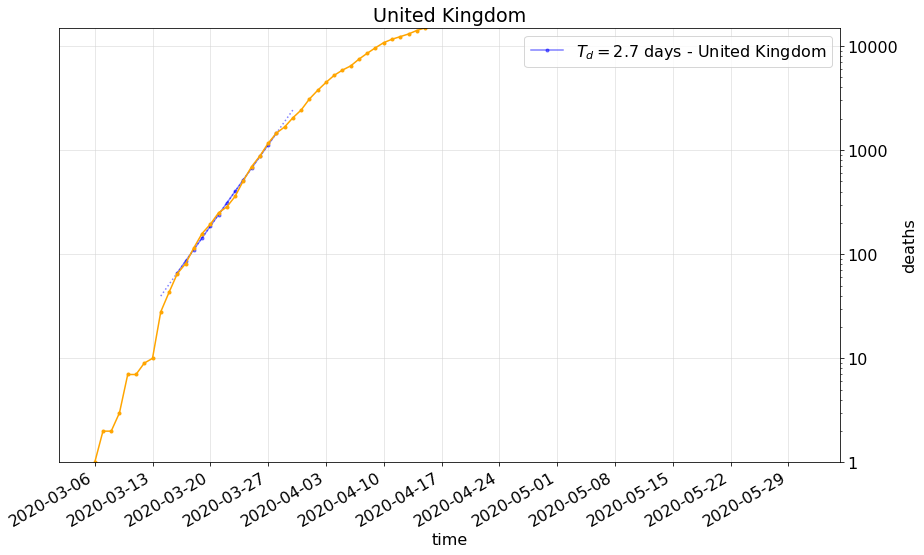

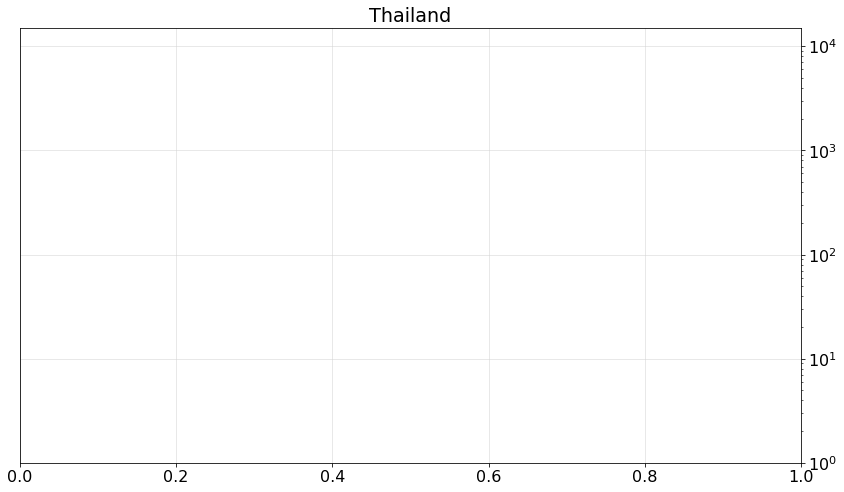

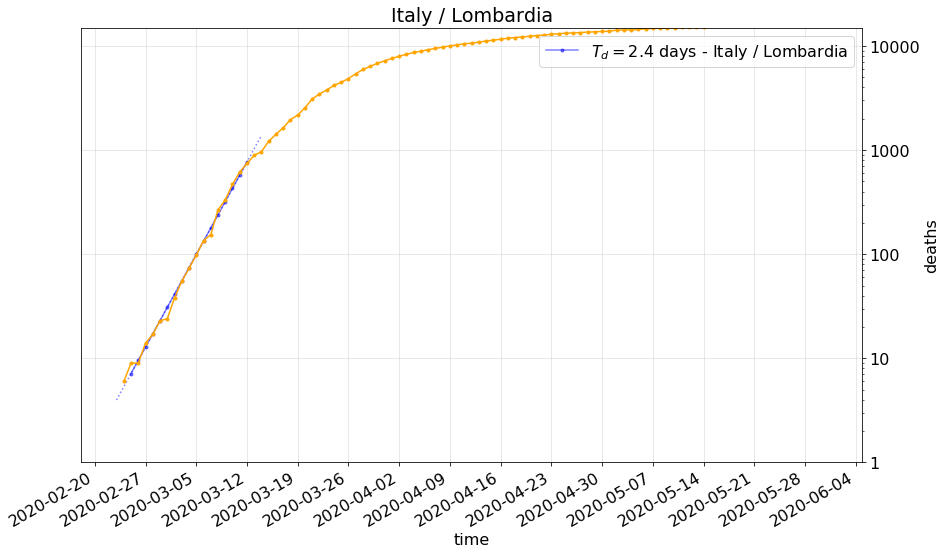

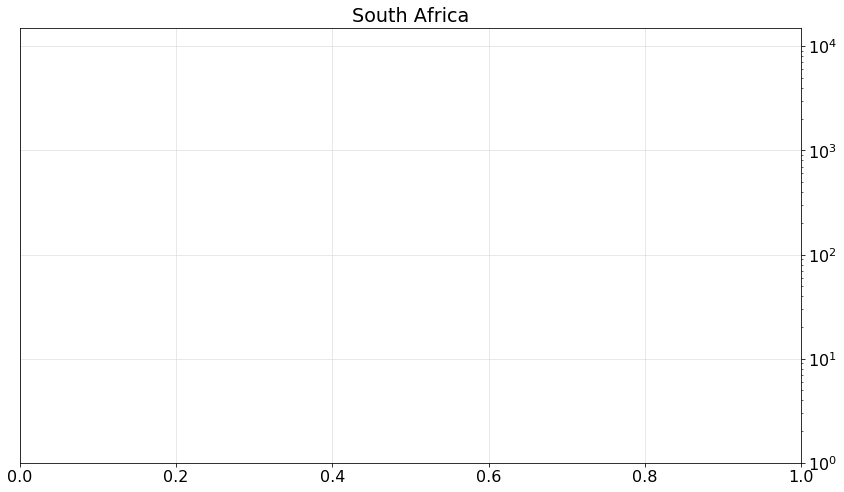

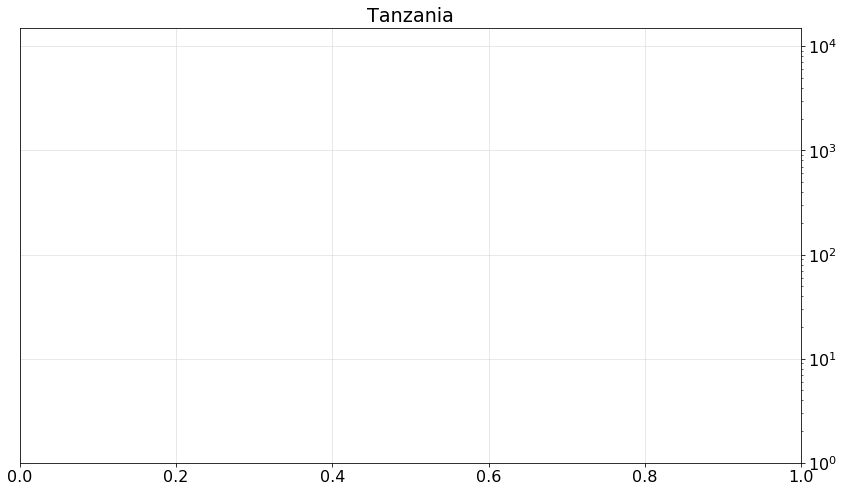

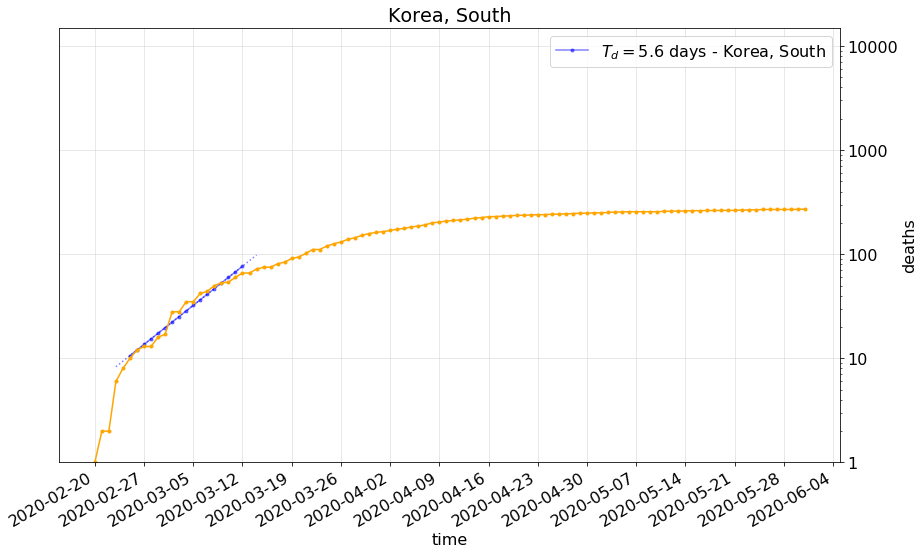

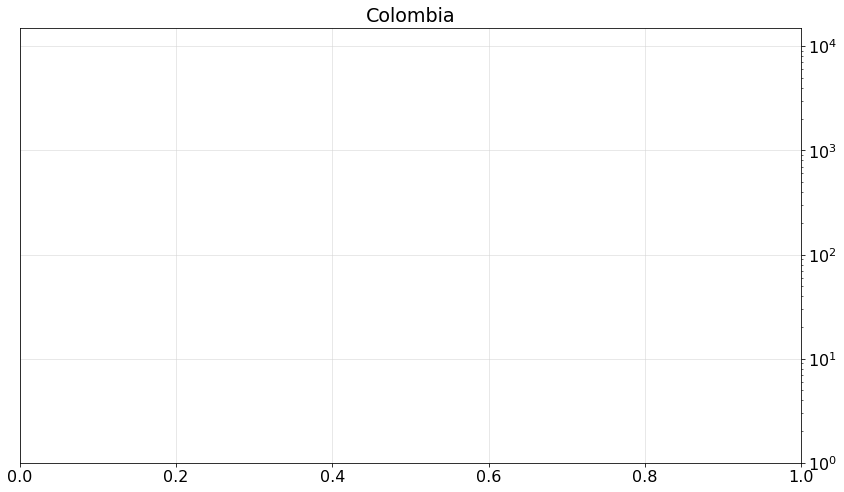

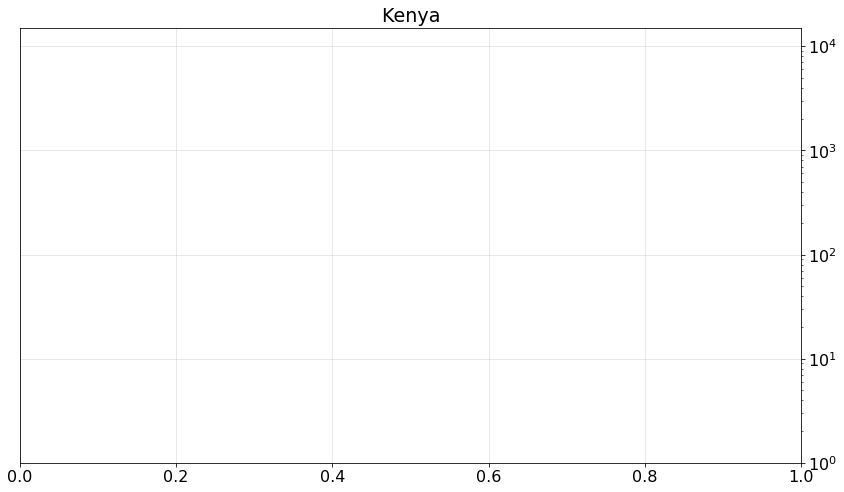

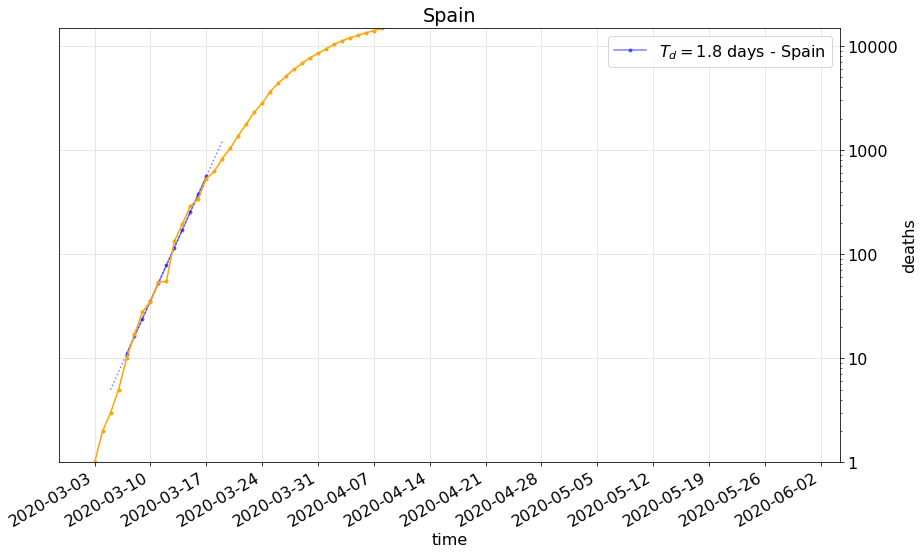

In [31]:
#deaths_exponential_outbreaks = covid19.data.read_outbreaks_metadata('c3s-covid-19-data - deaths-exponential-outbreaks.csv')
#outbreaks_fits = covid19.fit.fit_exponential_outbreaks([deaths_outbreaks], deaths_exponential_outbreaks)

for o in outbreaks_fits:
    try:
        f, ax = covid19.plot.subplots(subplot_kw={'yscale': 'log', 'ylim': (1, 15000), 'title': o['location']})
        data = deaths_outbreaks.sel(location=o['location'])
        covid19.plot.plot_fit(ax, o['fit'], label=o['location'], color='blue', alpha=0.5)
        covid19.plot.plot_data(ax, data, marker='o', markersize=3, color='orange')
        ax.set(title=o['location'])
        _ = ax.legend()
    except:
        pass
    #f, ax1 = covid19.plot.subplots()
    #tas.sel(lat=o['lat'], lon=o['lon'], method='nearest').plot(ax=ax1)
    #ax1.set(xlim=ax.get_xlim())